In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

path = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/stabilitydataset/'
TTVpath = 'data/TTVsystems/KOI-0314/simulation_archives/runs/sa'
respath = 'data/resonant/simulation_archives/runs/sa'

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


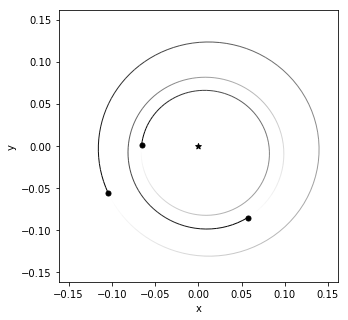

In [22]:
sa = rebound.SimulationArchive(path+TTVpath+'0000002.bin')
tmax = sa[1].t
sim = sa[0]

fig = rebound.OrbitPlot(sim)

In [23]:
ps = sim.particles
for i in [1,2]:
    print((ps[i+1].a-ps[i].a)/ps[i].a/((ps[i].m + ps[i+1].m)/ps[0].m)**(1/3.))

9.529650962789256
16.551262470389073


In [24]:
ps = sim.particles
Mstar = ps[0].m
P1 = ps[1].P

sim2 = rebound.Simulation()
sim2.G = 4*np.pi**2
sim2.add(m=1.)

for p in ps[1:]: 
    sim2.add(m=p.m/Mstar, P=p.P/P1, e=p.e, inc=p.inc, pomega=p.pomega, Omega=p.Omega, theta=p.theta)

sim2.move_to_com()

sim2.integrator="whfast"
sim2.dt=sim2.particles[1].P*2.*np.sqrt(3)/100.
sim2.ri_whfast.safe_mode = 0
sim2.ri_whfast.keep_unsynchronized = 1

In [25]:
import sys
sys.path.append('../')
from training_data_functions import normressummaryfeaturesxgb, AMD_stability_coefficients

In [26]:
nf = normressummaryfeaturesxgb(sim, (10000, 1000))
f = normressummaryfeaturesxgb(sim, (10000, 1000))

../training_data_functions.py:426: RuntimeWarning: Degrees of freedom <= 0 for slice
  var = [EM[:j].var() for j in range(len(EM))]
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../training_data_functions.py:445: RuntimeWarning: Degrees of freedom <= 0 for slice
  var = [Z[:j].var() for j in range(len(Z))]


In [30]:
ps[2].P/ps[1].P

1.3363445429382352

In [28]:
f

C_AMD12                1.675509e+01
C_AMD23                7.161696e-01
C_AMD_max              1.675509e+01
Zcross12               2.132413e-01
Zcross13               7.113296e-01
Zcross23               4.105435e-01
maxj                   4.000000e+00
maxk                   1.000000e+00
maxi1                  1.000000e+00
maxi2                  2.000000e+00
maxstrength            1.089897e-02
secondres              3.243521e-01
EMmed12                8.675779e-02
EMmax12                1.257573e-01
EMdrift12              2.682882e-02
capseculartscale12     1.000000e+00
EMdetrendedstd12       2.384911e-01
EMrollingstd12         1.649134e-01
DiffcoeffEM12          3.055733e-09
medvarEM12             4.958282e-04
Zmed12                 2.104022e-02
Zmax12                 4.390484e-02
Zdetrendedstd12        8.158829e-01
Zrollingstd12          6.754288e-01
DiffcoeffZ12           5.096451e-10
medvarZ12              1.135134e-04
Zcomdrift12            4.373103e-02
Zcomrollingstd12       1.308

In [14]:
f.keys()

Index(['C_AMD12', 'C_AMD23', 'C_AMD_max', 'Zcross12', 'Zcross13', 'Zcross23',
       'maxj', 'maxk', 'maxi1', 'maxi2', 'maxstrength', 'secondres', 'EMmed12',
       'EMmax12', 'EMdrift12', 'capseculartscale12', 'EMdetrendedstd12',
       'EMrollingstd12', 'DiffcoeffEM12', 'medvarEM12', 'Zmed12', 'Zmax12',
       'Zdetrendedstd12', 'Zrollingstd12', 'DiffcoeffZ12', 'medvarZ12',
       'Zcomdrift12', 'Zcomrollingstd12', 'phiZcomdrift12',
       'phiZcomrollingstd12', 'Zstardrift12', 'Zstarrollingstd12',
       'Zcosphistd12', 'medZcosphi12', 'EMmed23', 'EMmax23', 'EMdrift23',
       'capseculartscale23', 'EMdetrendedstd23', 'EMrollingstd23',
       'DiffcoeffEM23', 'medvarEM23', 'Zmed23', 'Zmax23', 'Zdetrendedstd23',
       'Zrollingstd23', 'DiffcoeffZ23', 'medvarZ23', 'Zcomdrift23',
       'Zcomrollingstd23', 'phiZcomdrift23', 'phiZcomrollingstd23',
       'Zstardrift23', 'Zstarrollingstd23', 'Zcosphistd23', 'medZcosphi23',
       'tlyap', 'megno'],
      dtype='object')

In [31]:
f-nf

C_AMD12                     0.000000
C_AMD23                     0.000000
C_AMD_max                   0.000000
Zcross12                    0.000000
Zcross13                    0.000000
Zcross23                    0.000000
maxj                        0.000000
maxk                        0.000000
maxi1                       0.000000
maxi2                       0.000000
maxstrength                 0.000000
secondres                   0.000000
EMmed12                     0.000000
EMmax12                     0.000000
EMdrift12                   0.000000
capseculartscale12          0.000000
EMdetrendedstd12            0.000000
EMrollingstd12              0.000000
DiffcoeffEM12               0.000000
medvarEM12                  0.000000
Zmed12                      0.000000
Zmax12                      0.000000
Zdetrendedstd12             0.000000
Zrollingstd12               0.000000
DiffcoeffZ12                0.000000
medvarZ12                   0.000000
Zcomdrift12                 0.000000
Z

In [15]:
for col in f.keys():
    print(col, (f[col]-nf[col]).mean())

C_AMD12 0.0
C_AMD23 0.0
C_AMD_max 0.0
Zcross12 0.0
Zcross13 0.0
Zcross23 0.0
maxj 0.0
maxk 0.0
maxi1 0.0
maxi2 0.0
maxstrength 0.0
secondres 0.0
EMmed12 0.0
EMmax12 0.0
EMdrift12 0.0
capseculartscale12 0.0
EMdetrendedstd12 0.0
EMrollingstd12 0.0
DiffcoeffEM12 0.0
medvarEM12 0.0
Zmed12 0.0
Zmax12 0.0
Zdetrendedstd12 0.0
Zrollingstd12 0.0
DiffcoeffZ12 0.0
medvarZ12 0.0
Zcomdrift12 0.0
Zcomrollingstd12 0.0
phiZcomdrift12 0.0
phiZcomrollingstd12 0.0
Zstardrift12 0.0
Zstarrollingstd12 0.0
Zcosphistd12 0.0
medZcosphi12 0.0
EMmed23 0.0
EMmax23 0.0
EMdrift23 0.0
capseculartscale23 0.0
EMdetrendedstd23 0.0
EMrollingstd23 0.0
DiffcoeffEM23 0.0
medvarEM23 0.0
Zmed23 0.0
Zmax23 0.0
Zdetrendedstd23 0.0
Zrollingstd23 0.0
DiffcoeffZ23 0.0
medvarZ23 0.0
Zcomdrift23 0.0
Zcomrollingstd23 0.0
phiZcomdrift23 0.0
phiZcomrollingstd23 0.0
Zstardrift23 0.0
Zstarrollingstd23 0.0
Zcosphistd23 0.0
medZcosphi23 0.0
tlyap 724250.3379950117
megno 0.009584887339971537


In [120]:
Nout = 1000
e, e2 = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0, 1e4, Nout)
for i, time in enumerate(times):
    sim.integrate(time*sim.particles[1].P)
    sim2.integrate(time*sim2.particles[1].P)
    e[i] = sim.particles[1].e
    e2[i] = sim2.particles[1].e

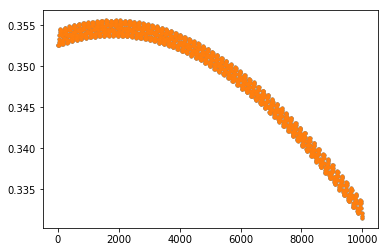

In [121]:
fig, ax = plt.subplots()
ax.plot(times, e, '.')
ax.plot(times, e2, '.')

In [122]:
sim2.calculate_megno()

2.0311338306510827

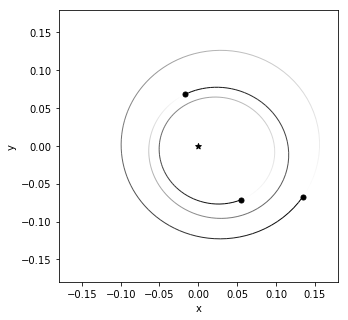

In [95]:
fig = rebound.OrbitPlot(sim)

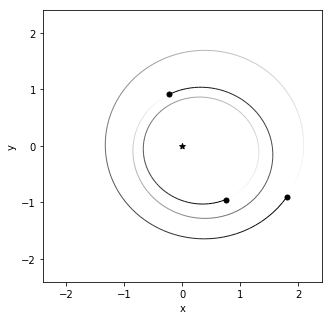

In [96]:
fig = rebound.OrbitPlot(sim2)

In [78]:
sim.dt/sim.particles[1].P

0.034643632014705474

In [79]:
2*np.sqrt(3)

3.4641016151377544

In [97]:
rebound.__githash__

'06c95e2a69d319de3b077d92f2541cdcdf68a8fa'

In [37]:
import pandas as pd
csvpath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/training_data/TTVsystems/KOI-0115/'
ndf = pd.read_csv(csvpath+'normressummaryfeaturesxgbNorbits10000.0Nout1000/trainingdata.csv', index_col=0)
ndf.head()

,C_AMD12,C_AMD23,C_AMD_max,Zcross12,Zcross13,Zcross23,maxj,maxk,maxi1,maxi2,...,Zcomdrift23,Zcomrollingstd23,phiZcomdrift23,phiZcomrollingstd23,Zstardrift23,Zstarrollingstd23,Zcosphistd23,medZcosphi23,tlyap,megno
0,0.105693,0.089463,0.105693,0.353616,0.626178,0.201358,2.0,1.0,1.0,3.0,...,0.416322,0.012854,0.308443,0.006879,0.035162,0.001541,0.037059,0.006649,-1.461971e+06,2.001100
1,1.504949,2.526332,2.526332,0.353652,0.626298,0.201415,4.0,1.0,2.0,3.0,...,0.013470,0.000439,0.294417,0.008627,0.069656,0.006495,0.033436,0.008836,-5.361323e+06,2.001282
2,0.681258,1.173940,1.173940,0.353742,0.626262,0.201308,4.0,1.0,2.0,3.0,...,0.077314,0.002408,0.098897,0.003162,0.066280,0.004294,0.034876,0.004585,-1.396584e+07,2.000833
3,0.080784,0.161035,0.161035,0.353476,0.626173,0.201478,4.0,1.0,2.0,3.0,...,0.149047,0.005759,0.578757,0.016756,0.018381,0.003252,0.024947,0.012221,1.207974e+06,1.999479
4,0.132273,0.277817,0.277817,0.353581,0.626106,0.201336,2.0,1.0,1.0,3.0,...,0.232082,0.005341,0.419972,0.013094,0.036427,0.003360,0.032332,0.007355,6.365815e+05,2.000559


In [38]:
df = pd.read_csv(csvpath+'ressummaryfeaturesxgbNorbits10000.0Nout1000/trainingdata.csv', index_col=0)
df.head()

,C_AMD12,C_AMD23,C_AMD_max,Zcross12,Zcross13,Zcross23,maxj,maxk,maxi1,maxi2,...,Zcomdrift23,Zcomrollingstd23,phiZcomdrift23,phiZcomrollingstd23,Zstardrift23,Zstarrollingstd23,Zcosphistd23,medZcosphi23,tlyap,megno
0,0.105693,0.089463,0.105693,0.353616,0.626178,0.201358,2.0,1.0,1.0,3.0,...,0.416322,0.012854,0.308443,0.006879,0.035162,0.001541,0.037059,0.006649,14300.843513,1.997693
1,1.504949,2.526332,2.526332,0.353652,0.626298,0.201415,4.0,1.0,2.0,3.0,...,0.013470,0.000439,0.294417,0.008627,0.069656,0.006495,0.033436,0.008836,138893.808379,2.001565
2,0.681258,1.173940,1.173940,0.353742,0.626262,0.201308,4.0,1.0,2.0,3.0,...,0.077314,0.002408,0.098897,0.003162,0.066280,0.004294,0.034876,0.004585,-82501.353014,2.000099
3,0.080784,0.161035,0.161035,0.353476,0.626173,0.201478,4.0,1.0,2.0,3.0,...,0.149047,0.005759,0.578757,0.016756,0.018381,0.003252,0.024947,0.012221,-69369.050431,2.001645
4,0.132273,0.277817,0.277817,0.353581,0.626106,0.201336,2.0,1.0,1.0,3.0,...,0.232082,0.005341,0.419972,0.013094,0.036427,0.003360,0.032332,0.007355,-176943.931484,2.001102


In [41]:
ndf['megno'].median()

2.0007552683030227

In [20]:
df.columns

Index(['C_AMD12', 'C_AMD23', 'C_AMD_max', 'Zcross12', 'Zcross13', 'Zcross23',
       'maxj', 'maxk', 'maxi1', 'maxi2', 'maxstrength', 'secondres', 'EMmed12',
       'EMmax12', 'EMdrift12', 'capseculartscale12', 'EMdetrendedstd12',
       'EMrollingstd12', 'DiffcoeffEM12', 'medvarEM12', 'Zmed12', 'Zmax12',
       'Zdetrendedstd12', 'Zrollingstd12', 'DiffcoeffZ12', 'medvarZ12',
       'Zcomdrift12', 'Zcomrollingstd12', 'phiZcomdrift12',
       'phiZcomrollingstd12', 'Zstardrift12', 'Zstarrollingstd12',
       'Zcosphistd12', 'medZcosphi12', 'EMmed23', 'EMmax23', 'EMdrift23',
       'capseculartscale23', 'EMdetrendedstd23', 'EMrollingstd23',
       'DiffcoeffEM23', 'medvarEM23', 'Zmed23', 'Zmax23', 'Zdetrendedstd23',
       'Zrollingstd23', 'DiffcoeffZ23', 'medvarZ23', 'Zcomdrift23',
       'Zcomrollingstd23', 'phiZcomdrift23', 'phiZcomrollingstd23',
       'Zstardrift23', 'Zstarrollingstd23', 'Zcosphistd23', 'medZcosphi23',
       'tlyap', 'megno'],
      dtype='object')

In [32]:
col = 'EMmed12'
df[col]-ndf[col]

0      -0.006750
1       0.004418
2       0.000150
3      -0.003865
4       0.000524
5      -0.002084
6       0.009901
7       0.003735
8      -0.000352
9       0.001852
10     -0.001437
11      0.001389
12     -0.006346
13     -0.000362
14      0.006926
15     -0.001610
16      0.000072
17     -0.003742
18      0.007655
19      0.002914
20     -0.007914
21     -0.008472
22     -0.000919
23      0.003654
24     -0.004465
25     -0.003561
26     -0.000706
27      0.000117
28      0.002834
29      0.002028
          ...   
1470   -0.003920
1471    0.000507
1472    0.005856
1473    0.003314
1474    0.000826
1475    0.008644
1476   -0.005591
1477    0.002020
1478    0.006137
1479    0.004733
1480   -0.000278
1481   -0.003911
1482   -0.001759
1483    0.001770
1484    0.002782
1485   -0.000262
1486   -0.005893
1487    0.002038
1488    0.006089
1489    0.008503
1490   -0.004665
1491    0.003817
1492    0.001073
1493    0.005696
1494    0.000818
1495   -0.006307
1496   -0.003688
1497    0.0011